# Simulation

In [1]:
import numpy as np

## Parameters

In [2]:
density_water = 1000  # kg/m^3
density_object = 500  # kg/m^3
object_volume = 0.1  # m^3
g = 9.81  # m/s^2
time_step = 0.01  # s
time_max = 10  # s

In [3]:
time = 0  # s
depth = 0  # m
velocity = 0  # m/s
acceleration = 0  # m/s^2
buoyancy =   density_water * g * object_volume # N
weight =  density_object * g * object_volume # N

In [4]:
# lists for plotting later
time = np.arange(0, time_max, time_step)
position = np.zeros_like(time)
velocity = np.zeros_like(time)
acceleration = np.zeros_like(time)

In [5]:
# simulation loop
for i in range(1, len(time)):
    # calculate the force on the object
    # Ft = Fb - Fg
    force = buoyancy - weight
    # calculate acceleration
    # F = ma -> a = m / F
    acceleration[i] = force / (weight / g)
    # calculate velocity
    # V(t) = at + V0
    velocity[i] = velocity[i - 1] + acceleration[i - 1] * time_step
    # calculate position
    # X(t) = X0 + V0t + 1/2 at^2
    position[i] = velocity[i - 1] * time_step + position[i - 1]


# Plot the results

In [6]:
import matplotlib.pyplot as plt

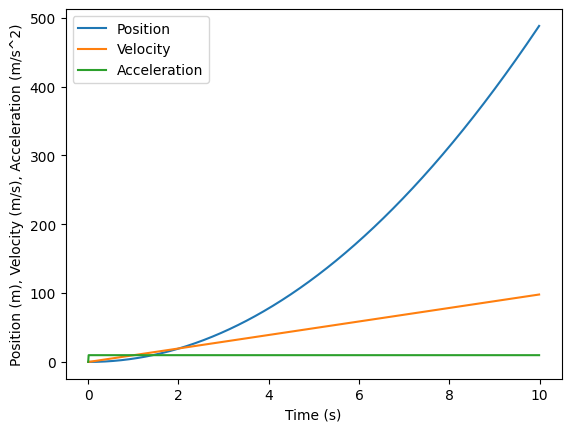

In [7]:

plt.plot(time, position, label="Position")
plt.plot(time, velocity, label="Velocity")
plt.plot(time, acceleration, label="Acceleration")
plt.xlabel("Time (s)")
plt.ylabel("Position (m), Velocity (m/s), Acceleration (m/s^2)")
plt.legend()
plt.show()

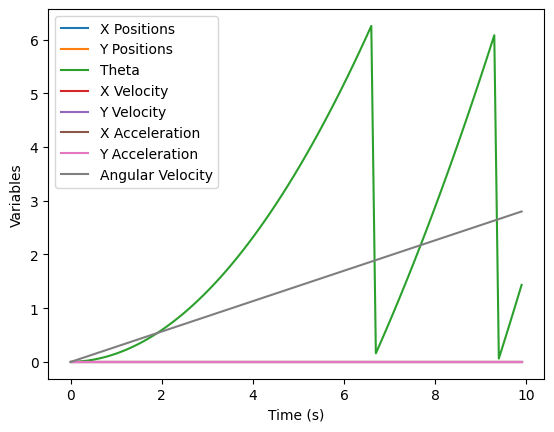

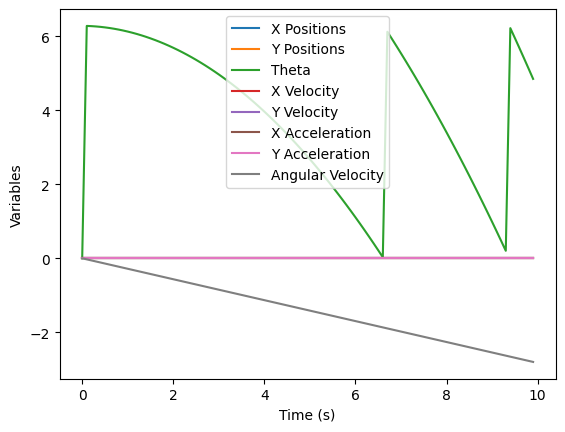

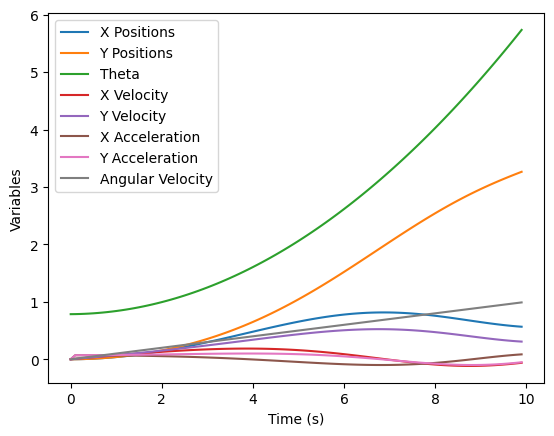

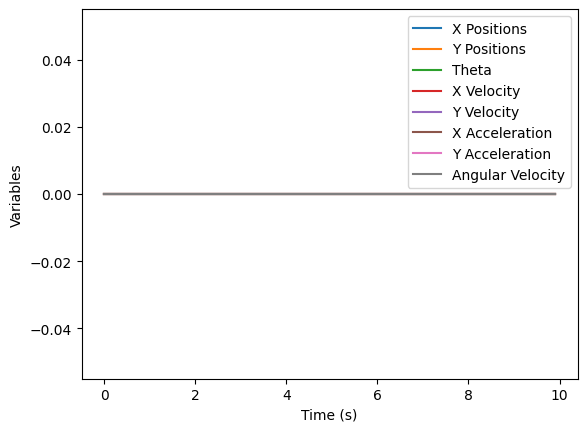

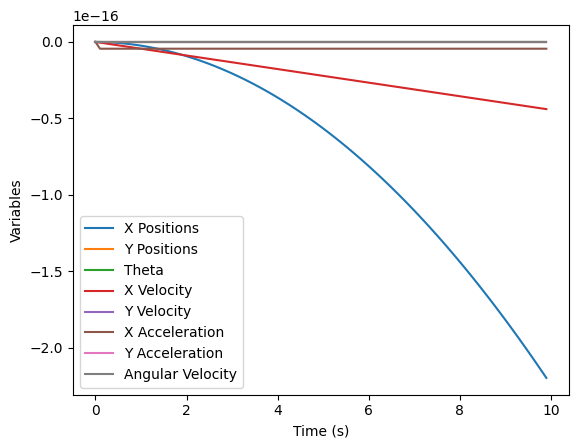

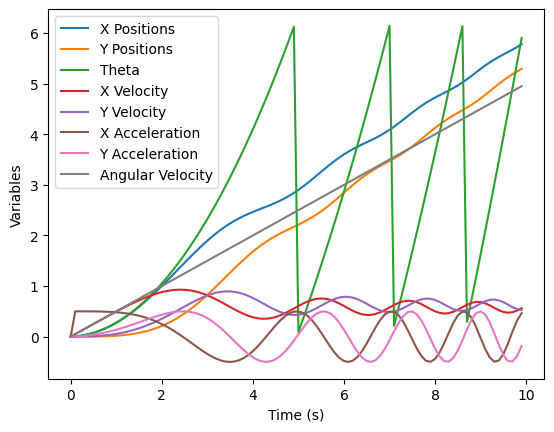

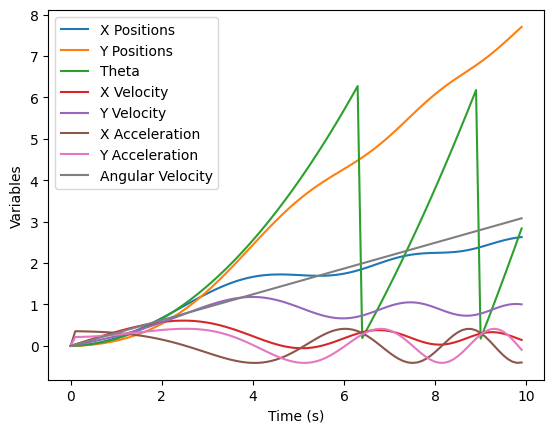

In [8]:
import physics
import numpy as np
# CCW Torque
(times, x, y, theta, v, omega, a) = physics.simulate_auv2_motion(
    np.array([10, 0, 10, 0]), np.pi / 4, 1, 1
)
physics.plot_auv2_motion(times, x, y, theta, v, omega, a)
# physics.plot_auv2_motion_individual(times, x, y, theta, v, omega, a, "CCW Torque")

# CW Torque
(times, x, y, theta, v, omega, a) = physics.simulate_auv2_motion(
    np.array([0, 10, 0, 10]), np.pi / 4, 1, 1
)
physics.plot_auv2_motion(times, x, y, theta, v, omega, a)
# physics.plot_auv2_motion_individual(times, x, y, theta, v, omega, a, "CW Torque")

# 1 force
(times, x, y, theta, v, omega, a) = physics.simulate_auv2_motion(
    np.array([10, 0, 0, 0]), 0, 1, 1, initial_theta=np.pi / 4
)
physics.plot_auv2_motion(times, x, y, theta, v, omega, a)
# physics.plot_auv2_motion_animated(times, x, y)
# physics.plot_auv2_motion_individual(
#     times, x, y, theta, v, omega, a, "Bottom Right Force only"
# )

# 0 force
(times, x, y, theta, v, omega, a) = physics.simulate_auv2_motion(
    np.array([0, 0, 0, 0]), np.pi / 4, 1, 1
)
physics.plot_auv2_motion(times, x, y, theta, v, omega, a)
# physics.plot_auv2_motion_individual(times, x, y, theta, v, omega, a, "No Forces")

# equal forces
(times, x, y, theta, v, omega, a) = physics.simulate_auv2_motion(
    np.array([10, 10, 10, 10]), np.pi / 4, 1, 1
)
physics.plot_auv2_motion(times, x, y, theta, v, omega, a)
# physics.plot_auv2_motion_individual(times, x, y, theta, v, omega, a, "All Forces Equal")

# theta is 0
(times, x, y, theta, v, omega, a) = physics.simulate_auv2_motion(
    np.array([50, 0, 0, 0]), 0, 1, 1
)
physics.plot_auv2_motion(times, x, y, theta, v, omega, a)
# physics.plot_auv2_motion_individual(times, x, y, theta, v, omega, a, "All Forces Equal")

# theta is 0
(times, x, y, theta, v, omega, a) = physics.simulate_auv2_motion(
    np.array([100, 30, 60, 20]), np.pi / 4, 0.2, 0.2
)
physics.plot_auv2_motion(times, x, y, theta, v, omega, a)
# physics.plot_auv2_motion_animated(times, x, y)

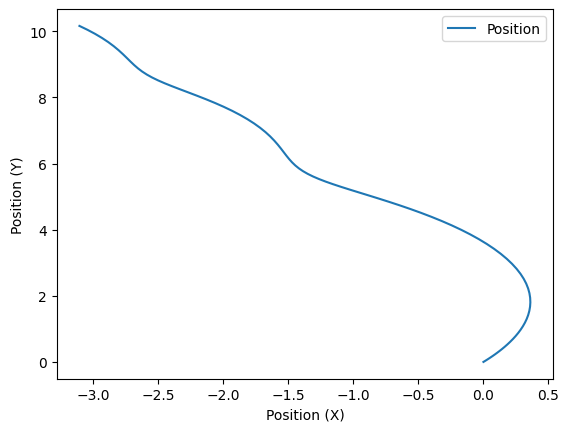

In [9]:
import matplotlib.pyplot as plt
import numpy
import physics

(times, x, y, _, _, _, _) = physics.simulate_auv2_motion(numpy.array([100, 10, 50, 30]), numpy.pi / 4, .2, .2)
plt.plot(x, y, label="Position")
plt.xlabel("Position (X)")
plt.ylabel("Position (Y)")
plt.legend()
plt.show()

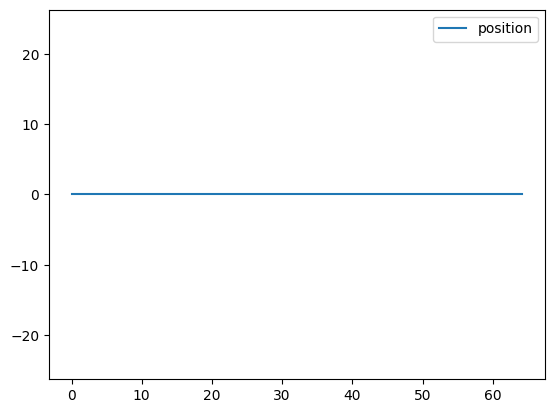

In [36]:
import numpy as np
import physics
import matplotlib.pyplot as plt

def calculate_moment(mass: float, length: float, width: float):
    return (1 / 12) * mass * (np.power(length, 2) + np.power(width, 2))
# AUV Statistics
length = 0.457 # 457 mm
width = 0.338 # 338 mm
mass = 11 # kg
moment = calculate_moment(mass, length, width) * 10
theta = np.pi / 4
initial_x = 0
initial_y = 0
initial_theta = 0
thrusters = np.array([10, 10, 0, 0])
time_step = 0.01
time_final = 10

(time,x,y,theta,v,omega,a) = physics.simulate_auv2_motion(thrusters, theta, width / 2, length / 2, moment, mass, time_step, time_final, initial_x, initial_y, initial_theta)
plt.plot(x,y, label="position")
plt.axis('equal')
plt.legend()
plt.show()

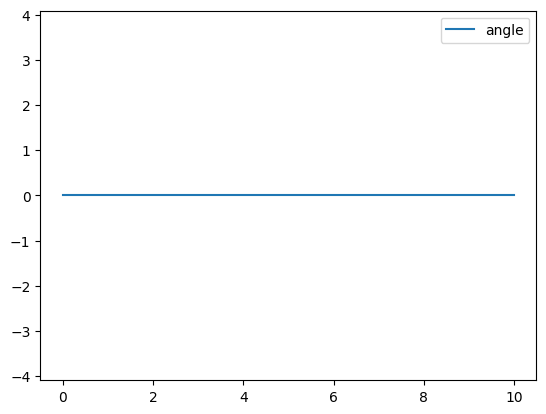

In [34]:
plt.axis('equal')
plt.plot(time, theta, label='angle')
plt.legend()
plt.show()

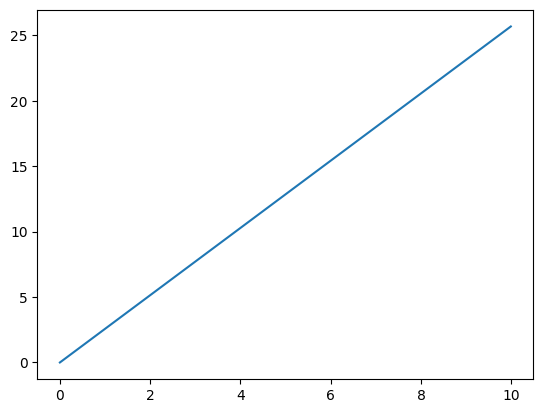

In [35]:
plt.plot(time, v[:, 0])
plt.show()